<a href="https://colab.research.google.com/github/Nagalakshmigithub62/Modelling-doc/blob/main/cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv


In [ ]:
%%capture
!pip install catboost skimpy
!pip install -U scikit-learn

In [ ]:
# Data manipulation
#============================================================
import pandas as pd
import numpy as np

# Data visualization
#============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# Stats
#===========================================================
# import ppscore as pps

# Data preprocessing
#============================================================
from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import TargetEncoder
# from sklearn.compose import ColumnTransformer

# Classifiers
#============================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#============================================================
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve

# Others
#============================================================
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8000   │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID         │   0 │    0 │  12000 │    2310 │    8000 │   10000 │  12000 │  14000 │  16000 │ ▇▇▇▇▇▇ │  │
│ │ Age                │   0 │    0 │  43.63 │    14.9 │      18 │      31 │     43 │     56 │     69 │ ▇▇▇▇▇▇ │  │
│ │ Income             │   0 │    0 │  84660 │   37580 │   20010 │   51740 │  84930 │ 116800 │ 150000 │ ▇▇▇▇▇▇ │  │
│ │ AdSpend            │   0 │    0 │   5001 │    2838 │   100.1 │    2523 │   5013 │   7408 │   9998 │ ▇▇▇▇▇▇ │  │
│ │ ClickThroughRate   │   0 │    0 │ 0.1548 │ 0.08401 │    0.01 │ 0.08263 │ 0.1545 │ 0.2282 │    0.3 │ ▇▇▇▇▇▇ │  │
│ │ ConversionRate     │   0 │    0 │ 0.1044 │ 0.05488 │ 0.01002 │ 0.05641 │  0.104 │ 0.1521 │    0.2 │ ▇▇▇▇▇▇ │  │
│ │ WebsiteVisits      │   0 │    0 │  24.75 │   14.31 │       0 │      13 │     25 │     37 │     49 │ ▇▇▇▇▇▇ │  │
│ │ PagesPerVisit      │   0 │    0 │  5.549 │   2.607 │       1 │   3.302 │  5.534 │  7.836 │  9.999 │ ▇▇▇▇▇▇ │  │
│ │ TimeOnSite         │   0 │    0 │  7.728 │   4.228 │  0.5017 │   4.068 │  7.683 │  11.48 │     15 │ ▇▇▇▇▇▇ │  │
│ │ SocialShares       │   0 │    0 │   49.8 │    28.9 │       0 │      25 │     50 │     75 │     99 │ ▇▇▇▇▇▇ │  │
│ │ EmailOpens         │   0 │    0 │  9.477 │   5.711 │       0 │       5 │      9 │     14 │     19 │ ▇▆▇▆▆▇ │  │
│ │ EmailClicks        │   0 │    0 │  4.467 │   2.857 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ PreviousPurchases  │   0 │    0 │  4.486 │   2.888 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ LoyaltyPoints      │   0 │    0 │   2490 │    1430 │       0 │    1255 │   2497 │   3702 │   4999 │ ▇▇▇▇▇▇ │  │
│ │ Conversion         │   0 │    0 │ 0.8765 │   0.329 │       0 │       1 │      1 │      1 │      1 │ ▁    ▇ │  │
│ └────────────────────┴─────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                               │     0 │         0 │                        1 │                 8000 │  │
│ │ CampaignChannel                      │     0 │      

In [ ]:
df = pd.read_csv('/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
data = pd.read_csv('/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv')
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [ ]:
# Checking duplicate rows
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 0


In [ ]:
discrete_variables = ["Age", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases"]
continuous_variables = ["Income", "AdSpend", "ClickThroughRate", "ConversionRate", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
categorical_variables = ["Gender", "CampaignType", "AdvertisingPlatform", "AdvertisingTool", "Conversion"]

In [ ]:
data = data.drop(columns = ["CustomerID"])
data.head()

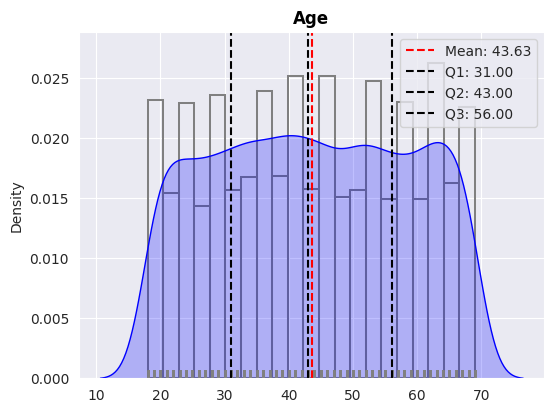

In [ ]:
sns.set_style(style = "darkgrid")

fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["Age"].quantile([0.25, 0.5, 0.75])
mu = data["Age"].mean()

sns.histplot(data, x = "Age", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "Age", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "Age", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("Age", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

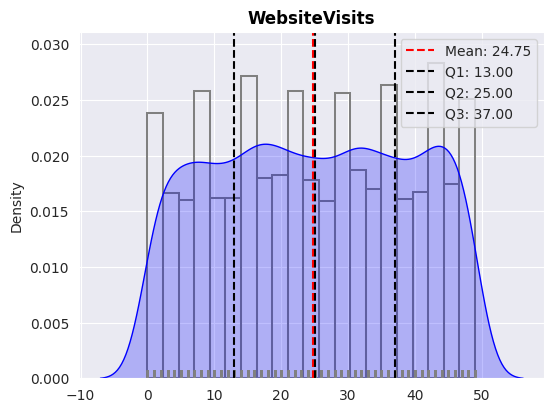

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["WebsiteVisits"].quantile([0.25, 0.5, 0.75])
mu = data["WebsiteVisits"].mean()

sns.histplot(data, x = "WebsiteVisits", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "WebsiteVisits", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "WebsiteVisits", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("WebsiteVisits", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

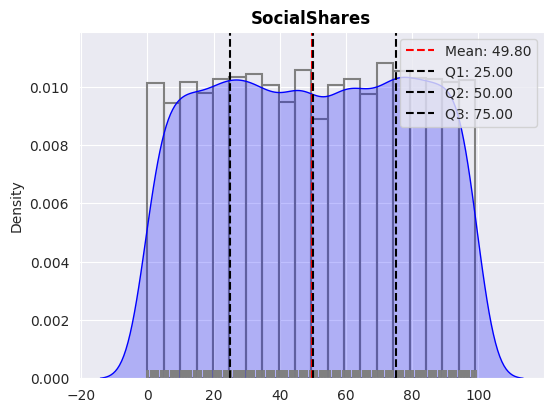

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["SocialShares"].quantile([0.25, 0.5, 0.75])
mu = data["SocialShares"].mean()

sns.histplot(data, x = "SocialShares", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "SocialShares", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "SocialShares", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("SocialShares", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

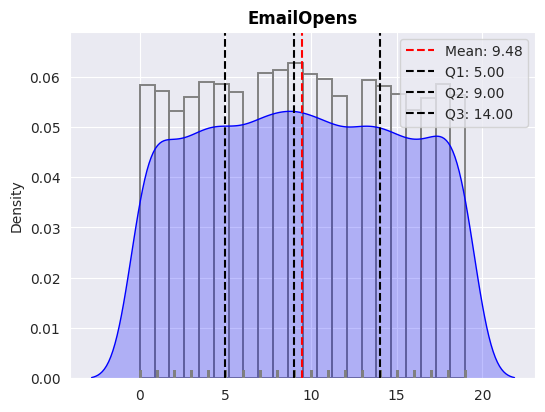

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["EmailOpens"].quantile([0.25, 0.5, 0.75])
mu = data["EmailOpens"].mean()

sns.histplot(data, x = "EmailOpens", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "EmailOpens", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "EmailOpens", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("EmailOpens", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

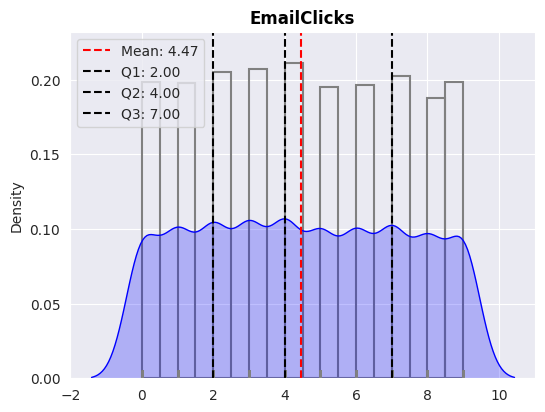

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["EmailClicks"].quantile([0.25, 0.5, 0.75])
mu = data["EmailClicks"].mean()

sns.histplot(data, x = "EmailClicks", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "EmailClicks", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "EmailClicks", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("EmailClicks", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

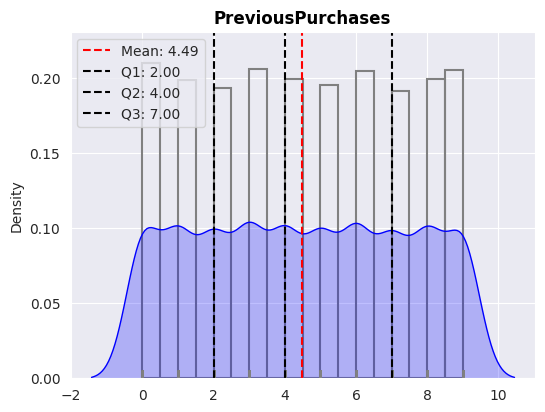

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["PreviousPurchases"].quantile([0.25, 0.5, 0.75])
mu = data["PreviousPurchases"].mean()

sns.histplot(data, x = "PreviousPurchases", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "PreviousPurchases", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "PreviousPurchases", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("PreviousPurchases", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

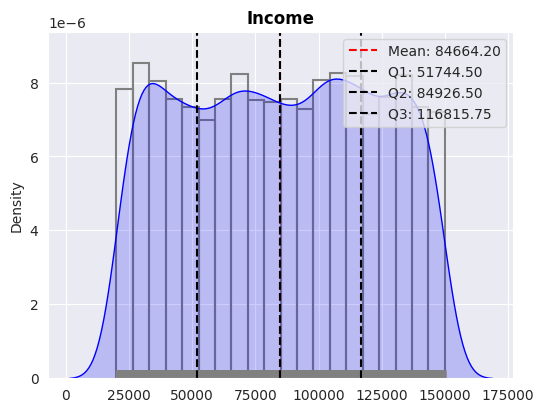

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["Income"].quantile([0.25, 0.5, 0.75])
mu = data["Income"].mean()

sns.histplot(data, x = "Income", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "Income", fill = True, ax = ax, color = "blue", alpha = 0.2)
sns.rugplot(data, x = "Income", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("Income", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

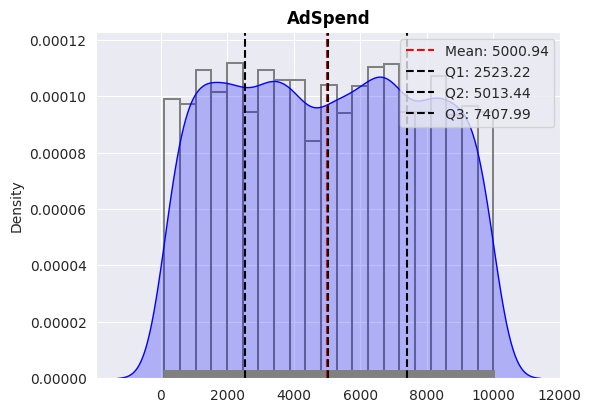

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["AdSpend"].quantile([0.25, 0.5, 0.75])
mu = data["AdSpend"].mean()

sns.histplot(data, x = "AdSpend", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "AdSpend", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "AdSpend", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("AdSpend", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

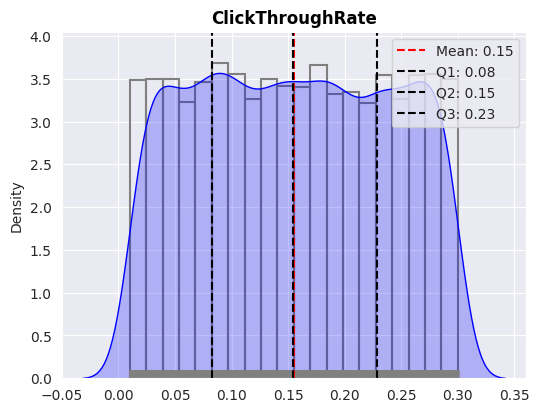

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["ClickThroughRate"].quantile([0.25, 0.5, 0.75])
mu = data["ClickThroughRate"].mean()

sns.histplot(data, x = "ClickThroughRate", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "ClickThroughRate", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "ClickThroughRate", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("ClickThroughRate", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

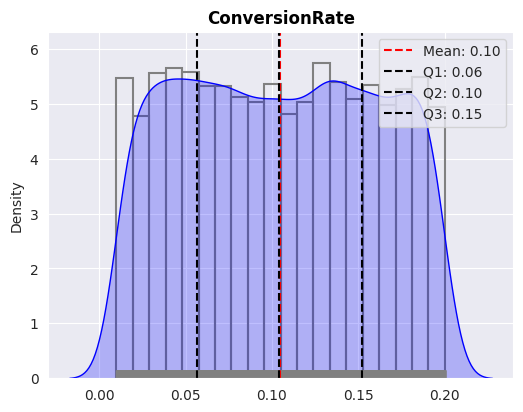

In [ ]:

fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["ConversionRate"].quantile([0.25, 0.5, 0.75])
mu = data["ConversionRate"].mean()

sns.histplot(data, x = "ConversionRate", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "ConversionRate", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "ConversionRate", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("ConversionRate", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()


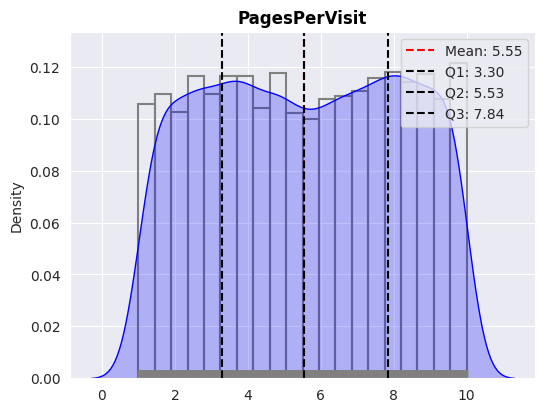

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["PagesPerVisit"].quantile([0.25, 0.5, 0.75])
mu = data["PagesPerVisit"].mean()

sns.histplot(data, x = "PagesPerVisit", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "PagesPerVisit", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "PagesPerVisit", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("PagesPerVisit", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

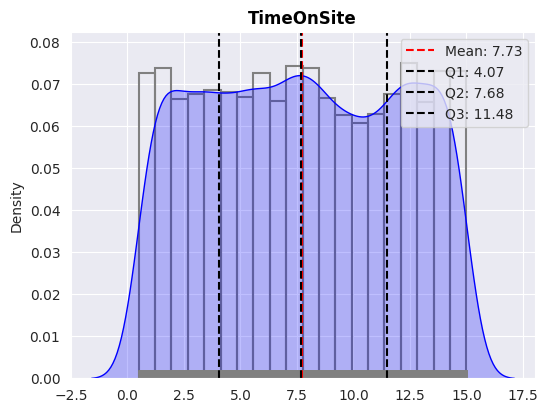

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["TimeOnSite"].quantile([0.25, 0.5, 0.75])
mu = data["TimeOnSite"].mean()

sns.histplot(data, x = "TimeOnSite", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "TimeOnSite", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "TimeOnSite", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("TimeOnSite", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

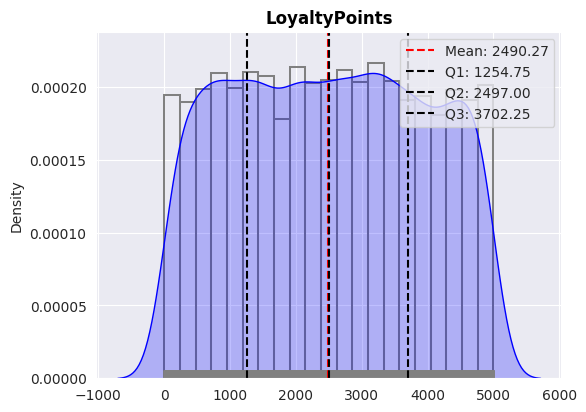

In [ ]:
fig,ax = plt.subplots(figsize = (6, 4.5))
q1, q2, q3 = data["LoyaltyPoints"].quantile([0.25, 0.5, 0.75])
mu = data["LoyaltyPoints"].mean()

sns.histplot(data, x = "LoyaltyPoints", stat = 'density', fill = False, ax = ax, color = "gray")
sns.kdeplot(data, x = "LoyaltyPoints", fill = True, ax = ax, color = "blue")
sns.rugplot(data, x = "LoyaltyPoints", ax = ax, color = "gray")
ax.axvline(mu, linestyle = "--", color = "r", label = f"Mean: {mu:.2f}")
ax.axvline(q1, linestyle = "--", color = "black", label = f"Q1: {q1:.2f}")
ax.axvline(q2, linestyle = "--", color = "black", label = f"Q2: {q2:.2f}")
ax.axvline(q3, linestyle = "--", color = "black", label = f"Q3: {q3:.2f}")
ax.set_xlabel("")
ax.set_title("LoyaltyPoints", fontsize = 12, fontweight = 'bold', color = "black")
ax.legend()
fig.show()

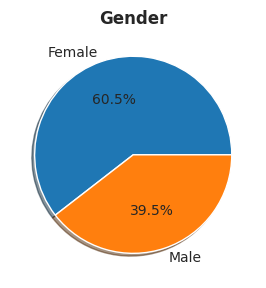

In [ ]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(data["Gender"]).values(),
        labels = Counter(data["Gender"]).keys(),
        autopct = "%.1f%%",
        shadow = True)
plt.title("Gender", fontsize = 12, fontweight = "bold")
plt.show()

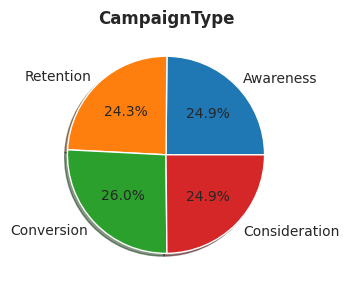

In [ ]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(data["CampaignType"]).values(),
        labels = Counter(data["CampaignType"]).keys(),
        autopct = "%.1f%%",
        shadow = True)
plt.title("CampaignType", fontsize = 12, fontweight = "bold")
plt.show()

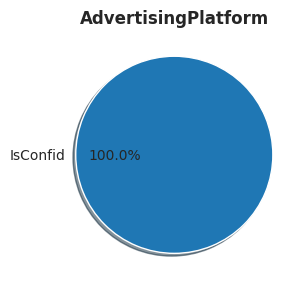

In [ ]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(data["AdvertisingPlatform"]).values(),
        labels = Counter(data["AdvertisingPlatform"]).keys(),
        autopct = "%.1f%%",
        shadow = True)
plt.title("AdvertisingPlatform", fontsize = 12, fontweight = "bold")
plt.show()

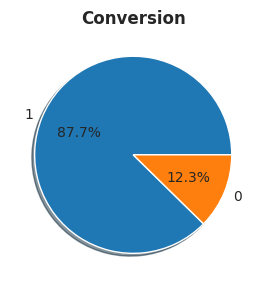

In [ ]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(data["Conversion"]).values(),
        labels = Counter(data["Conversion"]).keys(),
        autopct = "%.1f%%",
        shadow = True)
plt.title("Conversion", fontsize = 12, fontweight = "bold")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

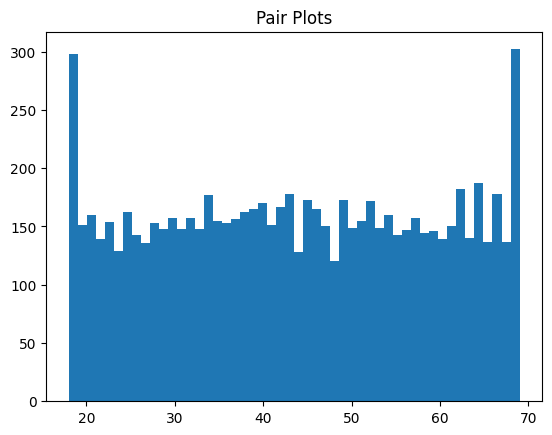

In [ ]:
plt.title('Pair Plots')
plt.hist(df.Age,bins=50)
plt.show()

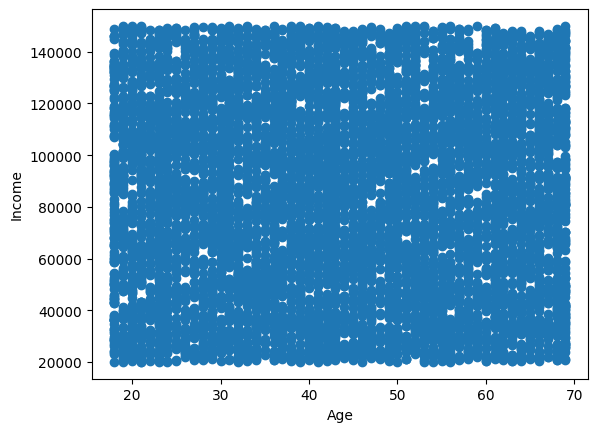

In [ ]:
plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [ ]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
df.Conversion.unique()

array([1, 0])

In [ ]:
df.AdvertisingPlatform.unique()

array(['IsConfid'], dtype=object)

In [ ]:
df.AdvertisingTool.unique()

array(['ToolConfid'], dtype=object)

In [ ]:
x = df.drop(['CustomerID','AdvertisingPlatform','AdvertisingTool','Conversion'], axis='columns')
x.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345


In [ ]:
y = df.Conversion
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Conversion, dtype: int64

In [ ]:
x.Age.describe()

count    8000.000000
mean       43.625500
std        14.902785
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

In [ ]:
x.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
x.Income.describe()

count      8000.000000
mean      84664.196750
std       37580.387945
min       20014.000000
25%       51744.500000
50%       84926.500000
75%      116815.750000
max      149986.000000
Name: Income, dtype: float64

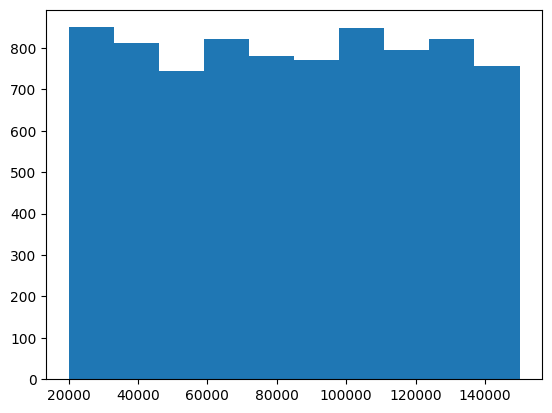

In [ ]:
plt.hist(x.Income)
plt.show()

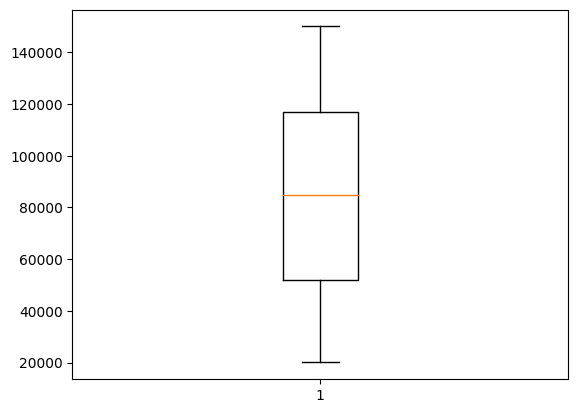

In [ ]:
plt.boxplot(x.Income)
plt.show()

In [ ]:
x.CampaignChannel.unique()

array(['Social Media', 'Email', 'PPC', 'Referral', 'SEO'], dtype=object)

In [ ]:
x.CampaignType.unique()

array(['Awareness', 'Retention', 'Conversion', 'Consideration'],
      dtype=object)

In [ ]:
x.AdSpend.describe()

count    8000.000000
mean     5000.944830
std      2838.038153
min       100.054813
25%      2523.221165
50%      5013.440044
75%      7407.989369
max      9997.914781
Name: AdSpend, dtype: float64

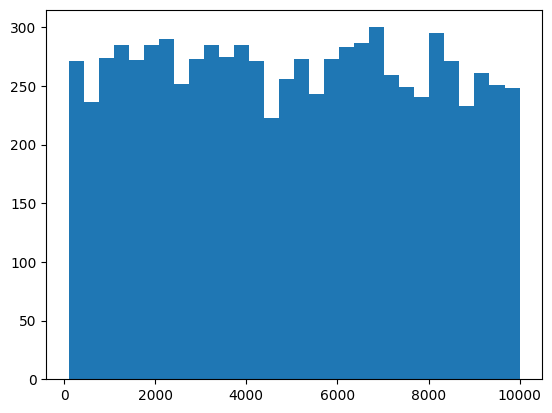

In [ ]:
plt.hist(x.AdSpend, bins=30)
plt.show()

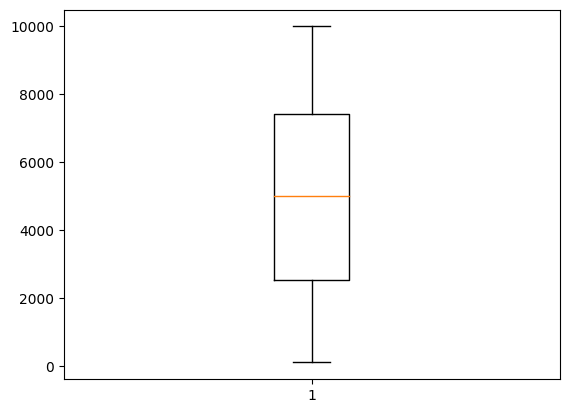

In [ ]:
plt.boxplot(df.AdSpend)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b62910e0b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7b62910e1330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b62910e22f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b62910e0af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b62910e0940>],
 'means': []}

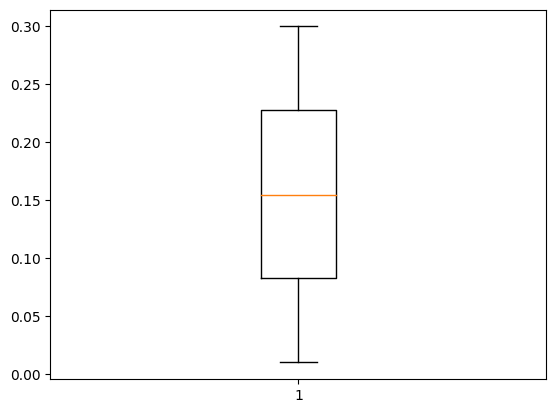

In [ ]:
plt.boxplot(x.ClickThroughRate)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b628b7cfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b628b600190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b628b7cc4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b628b6006d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b628b600970>],
 'means': []}

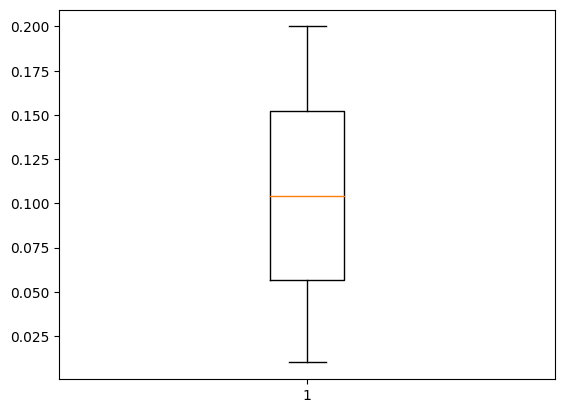

In [ ]:
plt.boxplot(x.ConversionRate)

In [ ]:
x.WebsiteVisits.describe()

count    8000.000000
mean       24.751625
std        14.312269
min         0.000000
25%        13.000000
50%        25.000000
75%        37.000000
max        49.000000
Name: WebsiteVisits, dtype: float64

In [ ]:
x.LoyaltyPoints.describe()

count    8000.000000
mean     2490.268500
std      1429.527162
min         0.000000
25%      1254.750000
50%      2497.000000
75%      3702.250000
max      4999.000000
Name: LoyaltyPoints, dtype: float64

In [ ]:
x.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
x.Gender = le.fit_transform(x.Gender)
x.CampaignChannel = le.fit_transform(x.CampaignChannel)
x.CampaignType = le.fit_transform(x.CampaignType)
x.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_scalled = scaler.fit_transform(x)
pd.DataFrame(x_scalled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.830400,-0.808229,1.390381,1.452867,-1.348537,0.527484,-1.320328,-0.298084,-1.729507,-1.208303,-0.078268,-1.065759,-0.608829,1.586840,-0.168115,-1.260823
1,1.702775,1.237273,-1.141736,-1.420363,1.352363,-0.388418,0.010671,1.427538,1.205221,-1.009576,-0.561778,-1.550199,-1.309262,0.886654,-0.860656,0.677701
2,0.159343,-0.808229,0.100905,-0.702056,-1.348537,-1.217296,1.460225,-0.509632,-1.589758,1.025746,1.435016,-1.723213,0.266712,-0.863810,1.216969,-0.107223
3,-0.780138,-0.808229,-1.079865,-0.702056,0.452063,-1.572106,-0.204964,-0.298580,1.554594,-0.386761,1.646339,1.356440,-1.309262,-0.863810,-1.553198,-0.019076
4,1.098823,-0.808229,-0.018633,-0.702056,0.452063,-1.170918,1.166907,0.101164,-1.729507,-1.343379,1.481958,-1.515596,-0.608829,0.536561,1.216969,1.297525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.518301,1.237273,-1.591759,-1.420363,-1.348537,1.239442,1.059063,0.225675,-0.122394,1.589564,1.537405,0.698986,0.616928,0.536561,0.870698,-1.542053
7996,-0.041975,-0.808229,-1.063020,0.734559,1.352363,-1.260221,0.975118,1.561230,1.694343,1.514927,-0.999683,0.076135,0.616928,-1.213903,0.178156,-0.691369
7997,-1.048561,-0.808229,1.085922,0.016252,-0.448237,-0.137924,-1.170243,0.536446,0.716100,-1.034084,1.629773,-0.408305,1.142253,-1.563996,-0.514385,-1.225845
7998,-1.652513,-0.808229,0.617323,-0.702056,-0.448237,1.576949,-1.557909,0.619545,1.694343,-1.743765,-0.910865,1.252632,-1.484370,0.186468,0.870698,0.153019


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape,y_train.shape

((6400, 16), (6400,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(LogisticRegression(), x_train,y_train, cv=5)
score.mean()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8762500000000001

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
score = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5)
score.mean()

0.8959374999999999

In [ ]:
from sklearn.svm import SVC

In [ ]:
score = cross_val_score(SVC(), x_train, y_train, cv=5)

In [ ]:
score.mean()

0.8759375

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
score = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5)
score.mean()

0.8659375

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model.score(x_test,y_test)

0.899375

In [ ]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[  39,  155],
       [   6, 1400]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.20      0.33       194\n           1       0.90      1.00      0.95      1406\n\n    accuracy                           0.90      1600\n   macro avg       0.88      0.60      0.64      1600\nweighted avg       0.90      0.90      0.87      1600\n'

In [ ]:
import joblib
joblib.dump(model, "my_random_forest.joblib")

['my_random_forest.joblib']